In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')  # replace with the actual dataset path


In [3]:
# Count how many rows have ID == 'AS14.01'
df[df['id'] == 'AS14.01'].shape[0]

21999

In [26]:
# Get counts of all unique IDs
df.shape[0]

365604

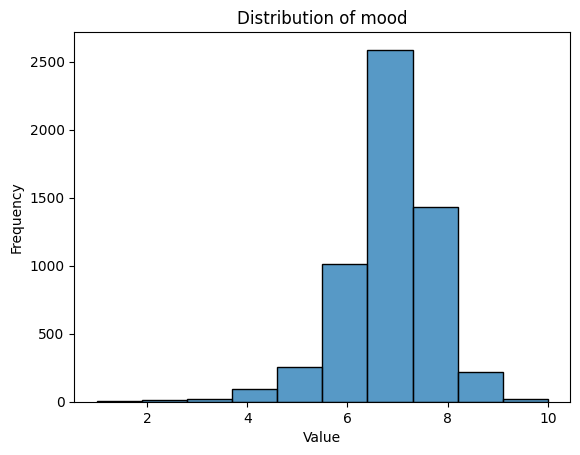

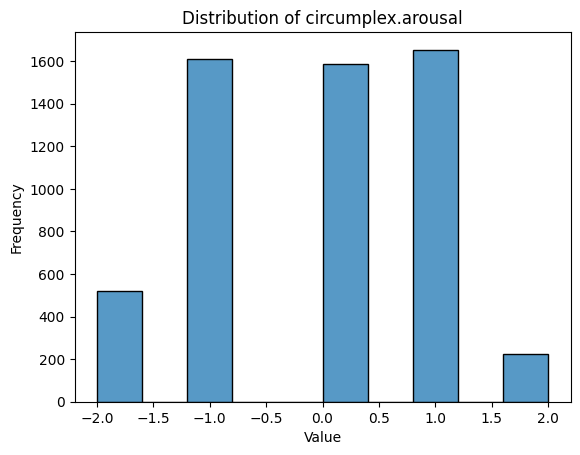

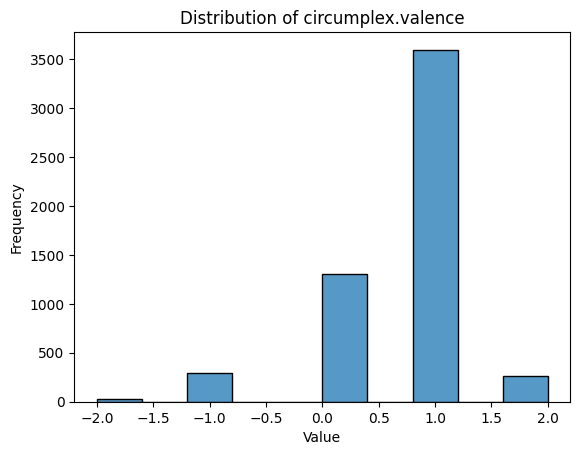

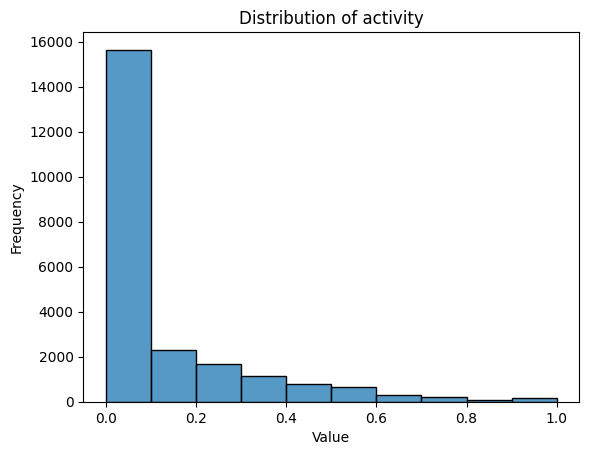

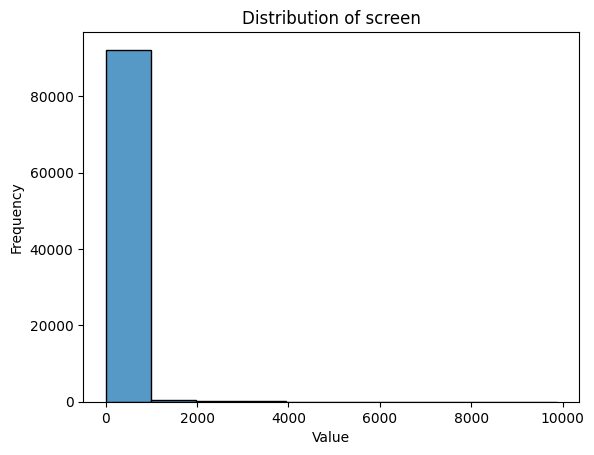

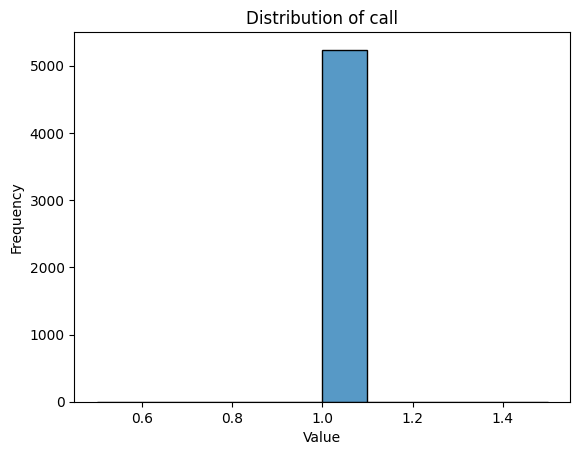

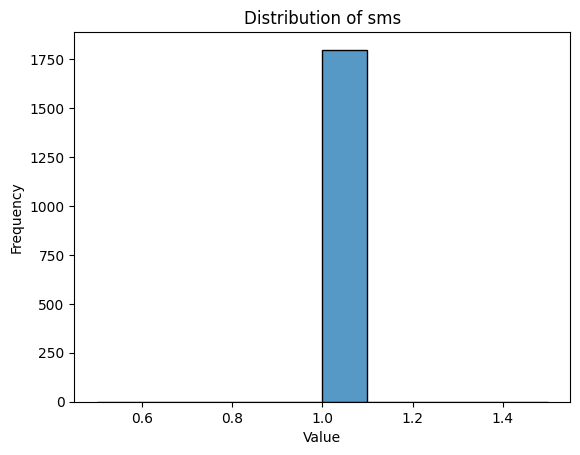

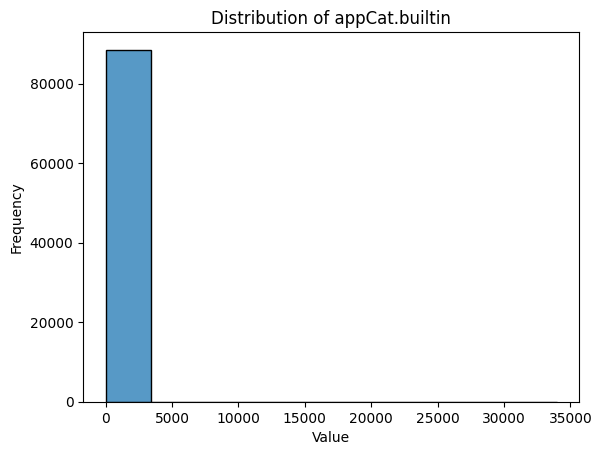

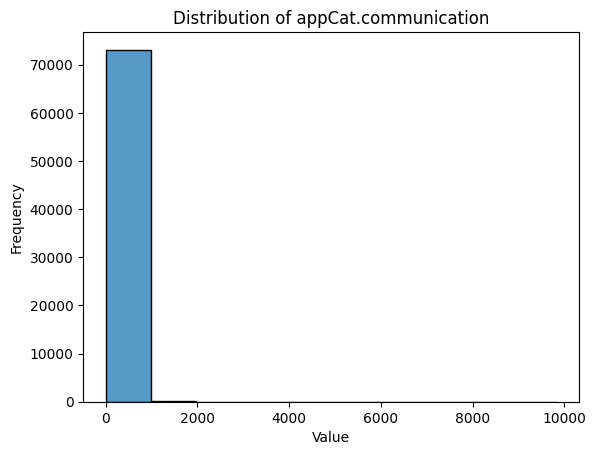

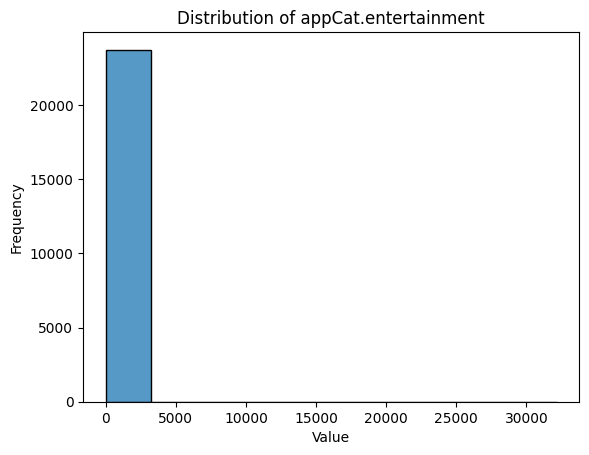

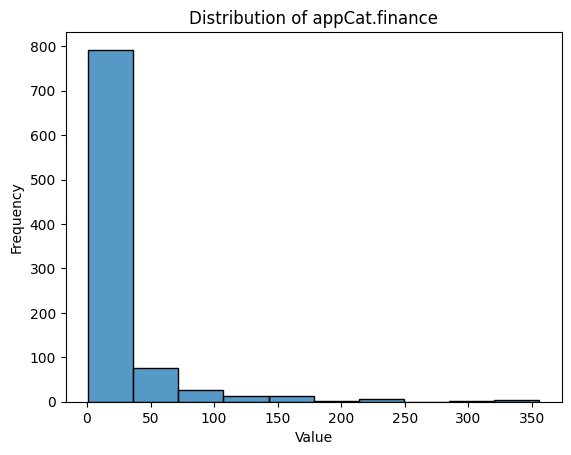

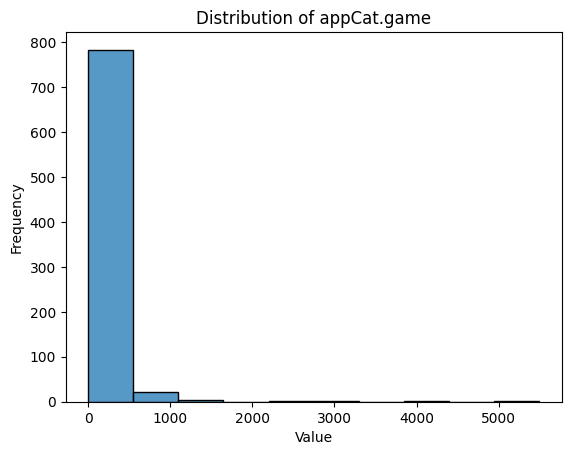

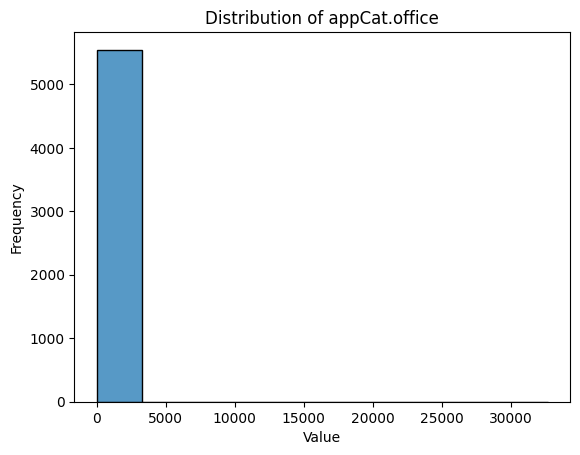

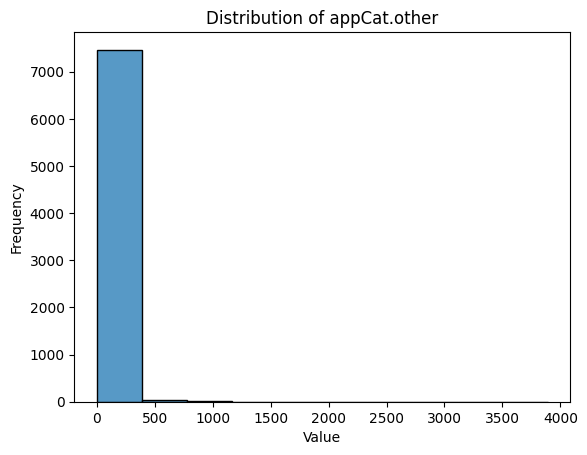

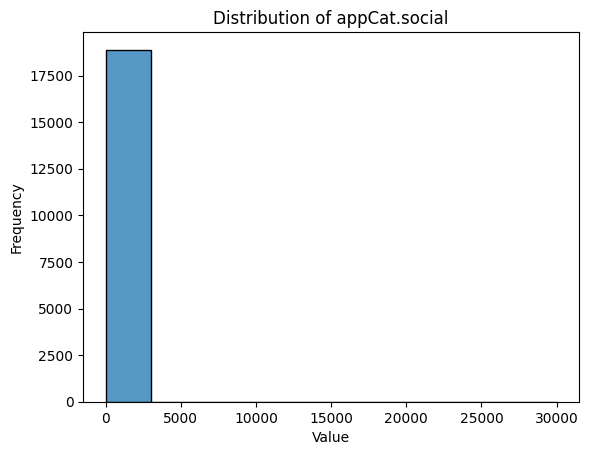

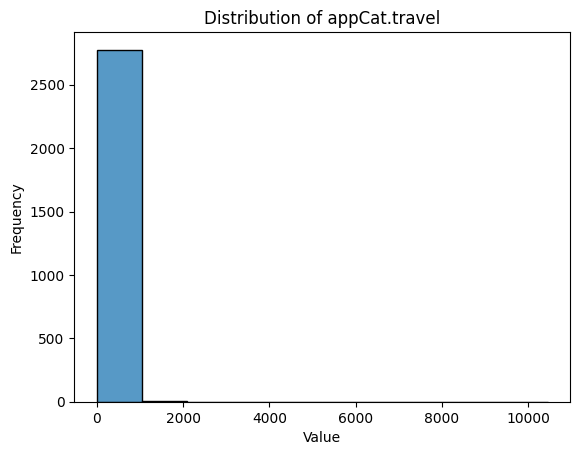

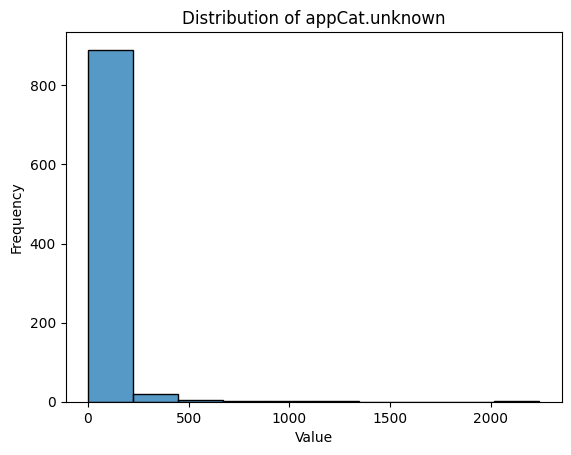

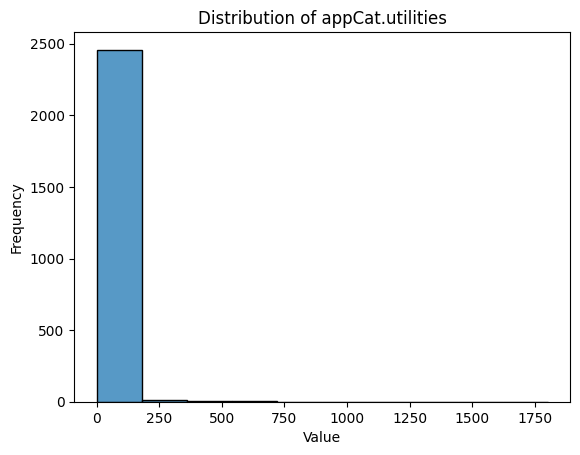

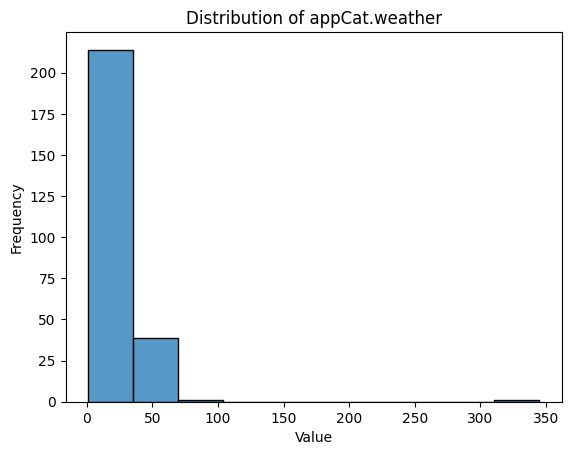

In [27]:
unique_variables = df['variable'].unique()
for var in unique_variables:
    plt.figure()
    sns.histplot(df[df['variable'] == var]['value'].astype(float), bins=10)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


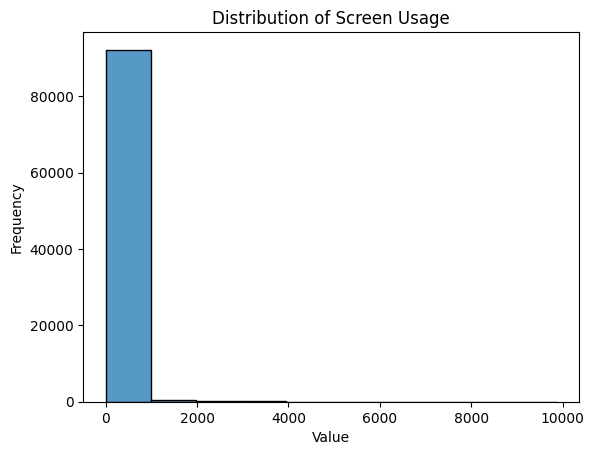

In [28]:
plt.figure()
sns.histplot(df[df['variable'] == 'screen']['value'].astype(float), bins=10)
plt.title('Distribution of Screen Usage')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



In [5]:
# Get counts of all unique IDs
df['variable'].value_counts()

variable
screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.valence       5643
circumplex.arousal       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64

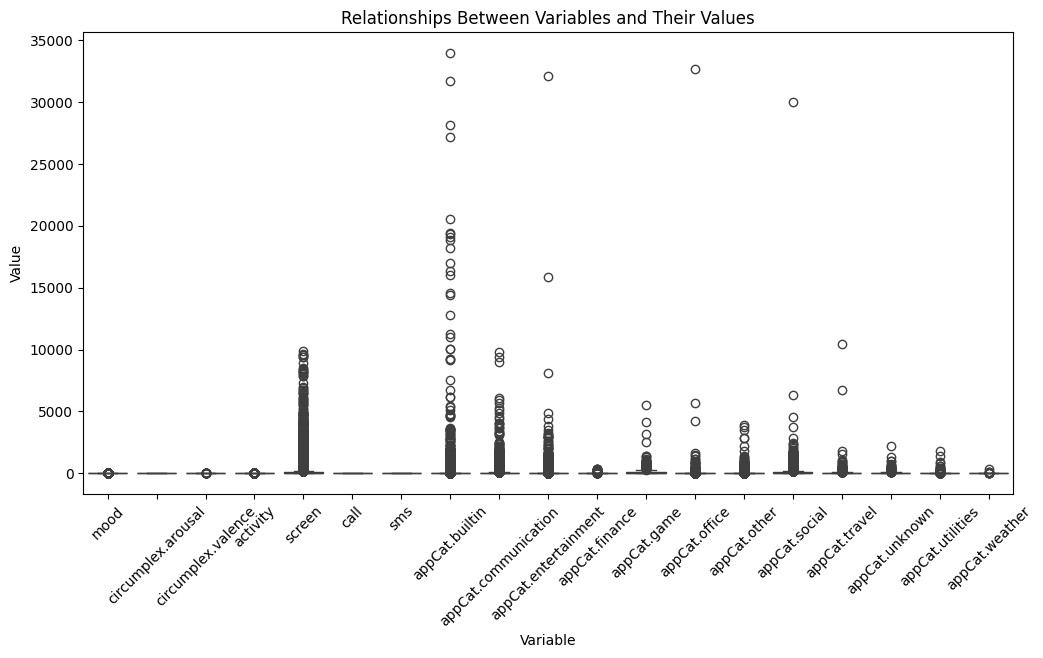

In [30]:
import seaborn as sns

# Create a box plot to visualize the relationships between 'variable' and 'value'
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df)
plt.title('Relationships Between Variables and Their Values')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [31]:
missing_counts = df['variable'][df['value'].isnull()].value_counts()
print(missing_counts)

variable
circumplex.valence    156
circumplex.arousal     46
Name: count, dtype: int64


<Axes: xlabel='value', ylabel='Count'>

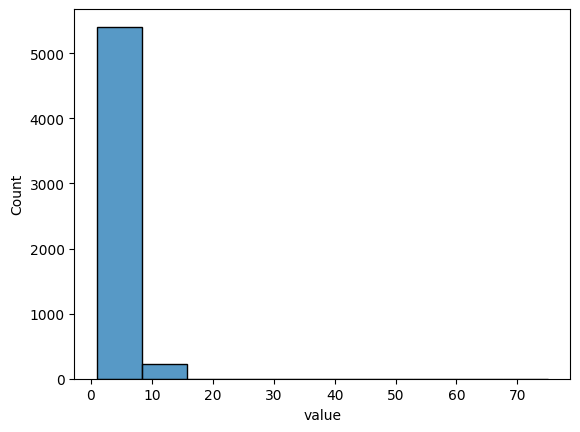

In [7]:
#Mood Distrubution
sns.histplot(df[df['variable'] == 'mood']['value'].astype(float), bins=10)

/var/folders/7f/7cdbnckj5j1b01ydyh6jjfbh0000gn/T/ipykernel_52244/2331008595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen_df['time'] = pd.to_datetime(screen_df['time'])


<Axes: xlabel='time'>

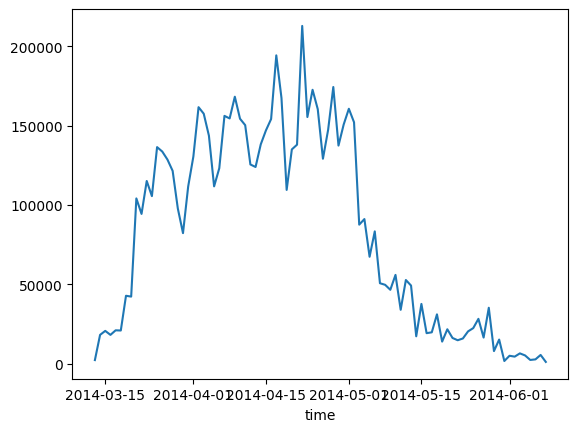

In [8]:
screen_df = df[df['variable'] == 'screen']
screen_df['time'] = pd.to_datetime(screen_df['time'])
screen_df.groupby(screen_df['time'].dt.date)['value'].sum().plot()

<Figure size 640x480 with 0 Axes>

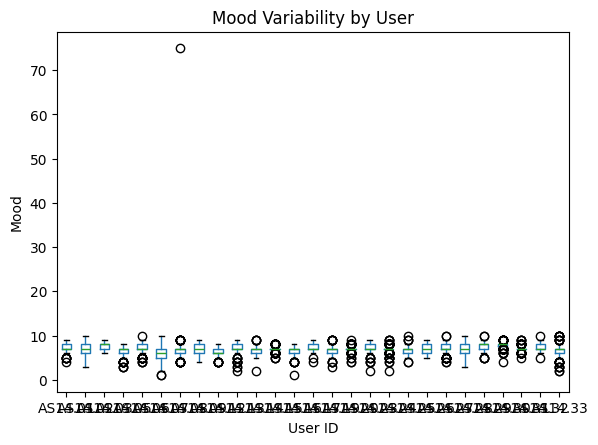

In [9]:
import matplotlib.pyplot as plt

# 1. Filter to mood only
df_mood = df[df['variable'] == 'mood']

# 2. Create a box plot grouped by 'id'
plt.figure()
df_mood.boxplot(column='value', by='id', grid=False)
plt.xlabel('User ID')
plt.ylabel('Mood')
plt.title('Mood Variability by User')
plt.suptitle('')  # remove the automatic Pandas title
plt.show()

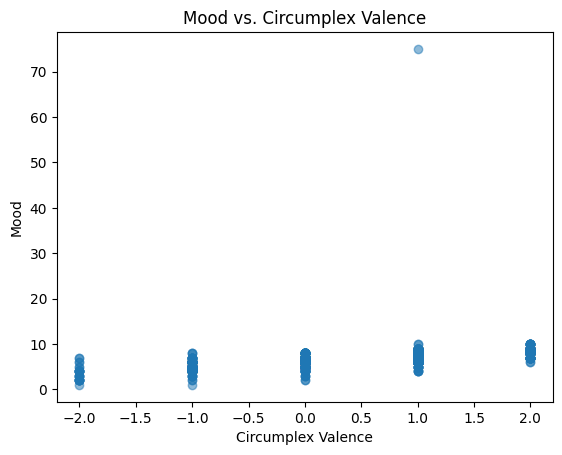

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Separate rows for mood and valence
df_mood = df[df['variable'] == 'mood'].copy()
df_mood.rename(columns={'value': 'mood_value'}, inplace=True)

df_val = df[df['variable'] == 'circumplex.valence'].copy()
df_val.rename(columns={'value': 'valence_value'}, inplace=True)

# 2. Merge on id and time
merged_mv = pd.merge(df_mood[['id','time','mood_value']],
                     df_val[['id','time','valence_value']],
                     on=['id','time'], how='inner')

# 3. Scatter plot
plt.figure()
plt.scatter(merged_mv['valence_value'], merged_mv['mood_value'], alpha=0.5)
plt.xlabel('Circumplex Valence')
plt.ylabel('Mood')
plt.title('Mood vs. Circumplex Valence')
plt.show()

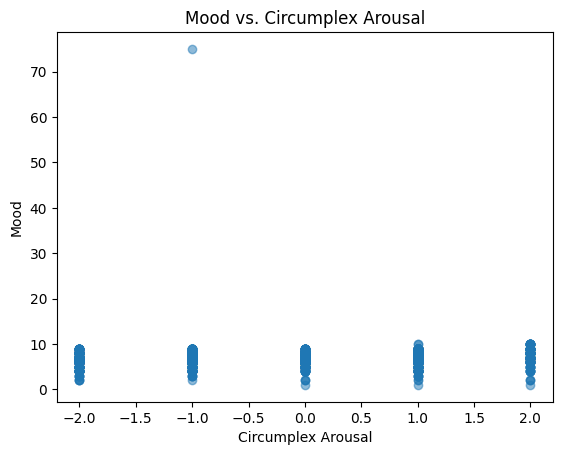

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_mood = df[df['variable'] == 'mood'].copy()
df_mood.rename(columns={'value': 'mood_value'}, inplace=True)

df_arousal = df[df['variable'] == 'circumplex.arousal'].copy()
df_arousal.rename(columns={'value': 'arousal_value'}, inplace=True)

merged_ma = pd.merge(df_mood[['id','time','mood_value']],
                     df_arousal[['id','time','arousal_value']],
                     on=['id','time'], how='inner')

plt.figure()
plt.scatter(merged_ma['arousal_value'], merged_ma['mood_value'], alpha=0.5)
plt.xlabel('Circumplex Arousal')
plt.ylabel('Mood')
plt.title('Mood vs. Circumplex Arousal')
plt.show()

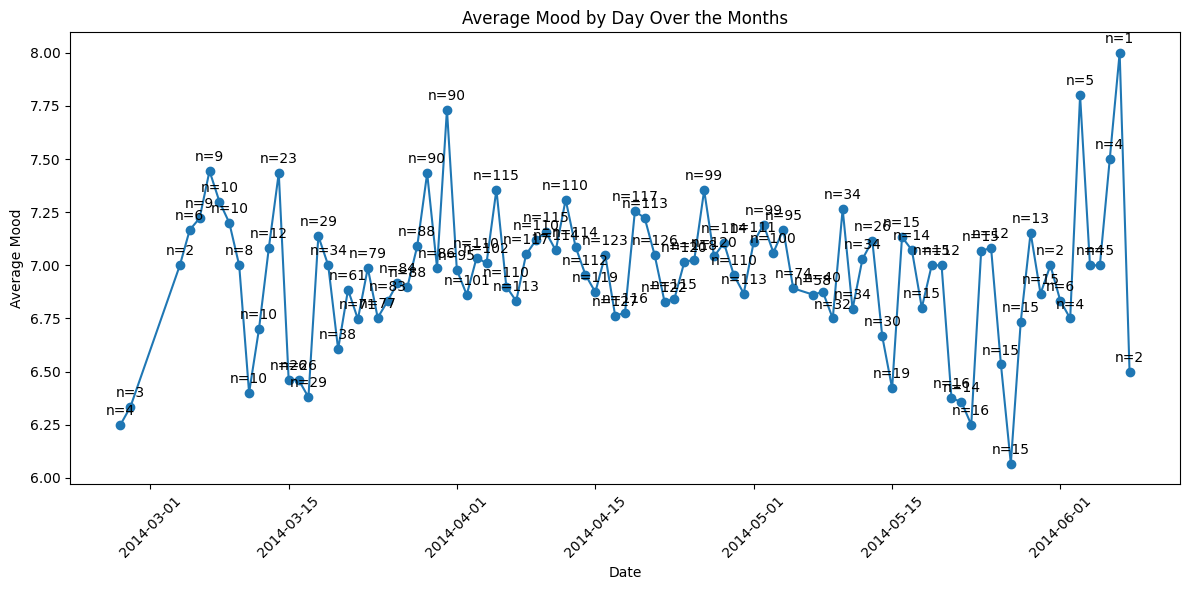

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter DataFrame to mood-only rows
df_mood = df[df['variable'] == 'mood'].copy()

# 2. Convert 'time' to datetime
df_mood['time'] = pd.to_datetime(df_mood['time'], errors='coerce')

# 3. Extract the date (year-month-day)
df_mood['date'] = df_mood['time'].dt.date

# 4. Group by date (calendar day) and compute mean + count
grouped = df_mood.groupby('date')['value']
avg_mood_by_date = grouped.mean()
count_by_date = grouped.count()

# 5. Plot the average mood by day
plt.figure(figsize=(12, 6))
ax = avg_mood_by_date.plot(kind='line', marker='o')  # each date is a point on the x-axis
plt.xlabel('Date')
plt.ylabel('Average Mood')
plt.title('Average Mood by Day Over the Months')
plt.xticks(rotation=45)  # rotate date labels if they overlap

# 6. Annotate each point with the daily count of mood entries
for d, mean_val in avg_mood_by_date.items():
    n = count_by_date[d]
    ax.annotate(
        f'n={n}',
        xy=(d, mean_val),
        xytext=(0, 5),
        textcoords='offset points',
        ha='center', va='bottom'
    )

plt.tight_layout()  # reduce label overlap
plt.show()

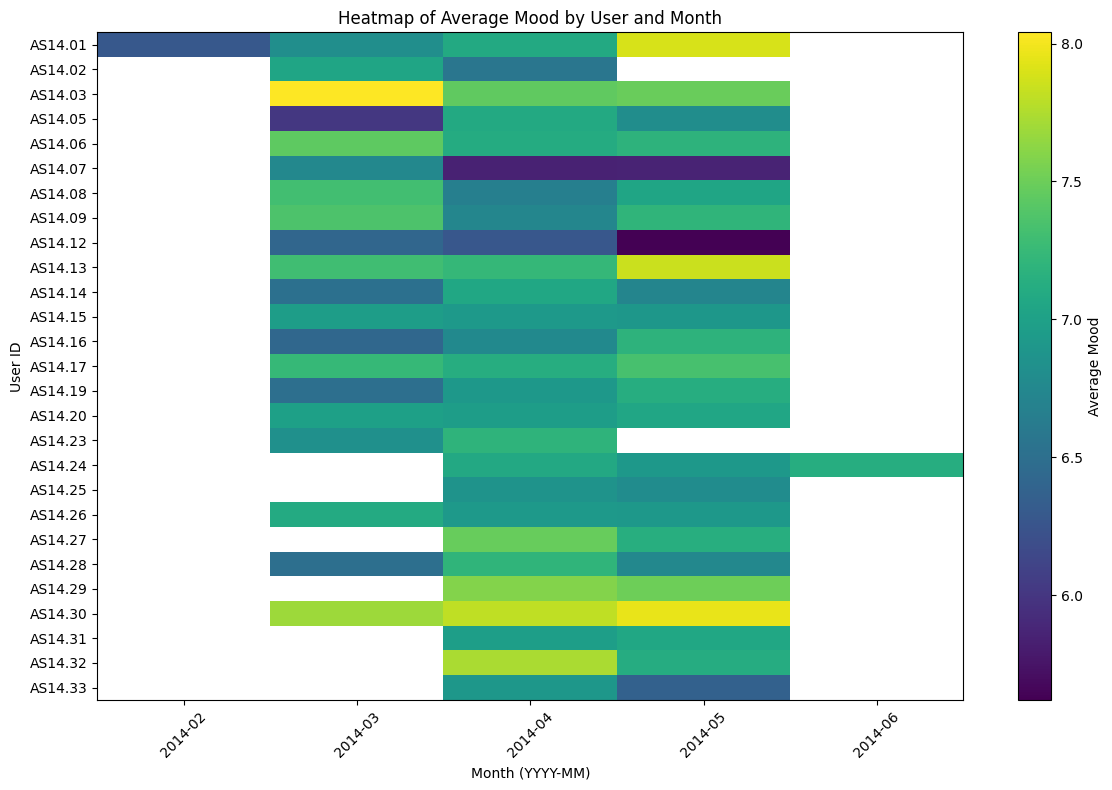

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Filter and convert time ---
df_mood = df[df['variable'] == 'mood'].copy()
df_mood['time'] = pd.to_datetime(df_mood['time'], errors='coerce')

# --- 2. Create a year-month indicator ---
df_mood['year_month'] = df_mood['time'].dt.to_period('M')

# --- 3. Group by (user, year_month) and compute average mood ---
grouped = df_mood.groupby(['id', 'year_month'])['value'].mean()

# --- 4. Convert to a matrix: rows=users, columns=months ---
avg_mood_matrix = grouped.unstack('year_month')

# If you used Period('M'), convert columns to a sortable string or timestamp
avg_mood_matrix.columns = avg_mood_matrix.columns.astype(str)

# --- 5. Plot as a heatmap ---
plt.figure(figsize=(12, 8))
plt.imshow(avg_mood_matrix, aspect='auto', interpolation='nearest')
plt.colorbar(label='Average Mood')

# --- 6. Label rows/columns ---
plt.yticks(range(len(avg_mood_matrix.index)), avg_mood_matrix.index)
plt.xticks(range(len(avg_mood_matrix.columns)), avg_mood_matrix.columns, rotation=45)
plt.title("Heatmap of Average Mood by User and Month")
plt.xlabel("Month (YYYY-MM)")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()

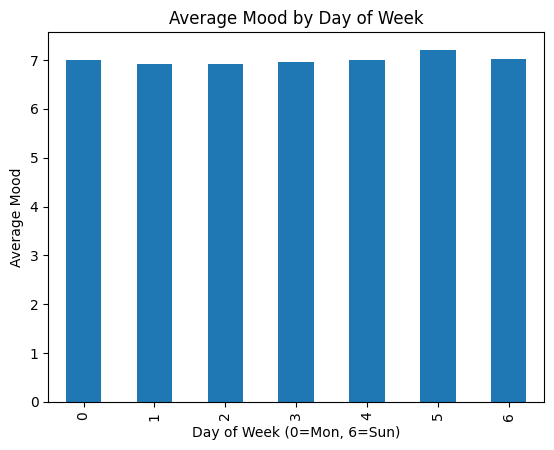

In [14]:
df_mood = df[df['variable'] == 'mood'].copy()
df_mood['time'] = pd.to_datetime(df_mood['time'], errors='coerce')

# Extract day of week
df_mood['day_of_week'] = df_mood['time'].dt.dayofweek

avg_mood_by_dow = df_mood.groupby('day_of_week')['value'].mean()

plt.figure()
avg_mood_by_dow.plot(kind='bar')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Mood')
plt.title('Average Mood by Day of Week')
plt.show()

<Figure size 1000x600 with 0 Axes>

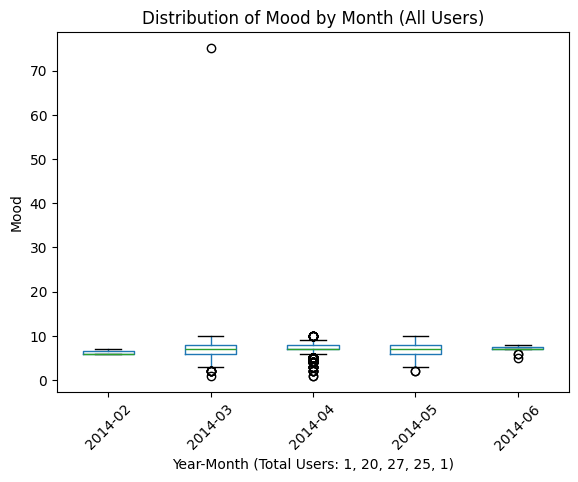

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df_mood = df[df['variable'] == 'mood'].copy()
df_mood['time'] = pd.to_datetime(df_mood['time'], errors='coerce')
df_mood['year_month'] = df_mood['time'].dt.to_period('M')

# Group the data by month, but keep individual user rows
# We'll transform .dt.to_period('M') to string for easier plotting
df_mood['year_month_str'] = df_mood['year_month'].astype(str)

# Calculate the total number of users for each month
user_counts = df_mood.groupby('year_month_str')['id'].nunique().reset_index(name='total_users')
df_mood = df_mood.merge(user_counts, on='year_month_str')

plt.figure(figsize=(10, 6))
df_mood.boxplot(column='value', by='year_month_str', grid=False)
plt.title('Distribution of Mood by Month (All Users)')
plt.suptitle('')  # remove the default 'Boxplot grouped by year_month_str'
plt.xlabel('Year-Month (Total Users: ' + ', '.join(user_counts['total_users'].astype(str)) + ')')
plt.ylabel('Mood')
plt.xticks(rotation=45)
plt.show()

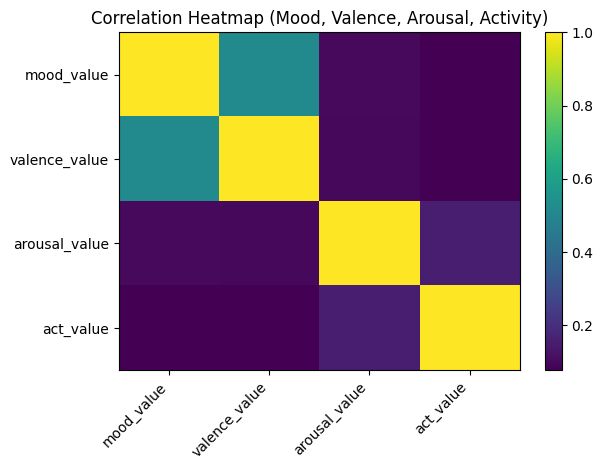

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Separate dataframes by variable
df_mood = df[df['variable'] == 'mood'].copy()
df_mood.rename(columns={'value': 'mood_value'}, inplace=True)

df_val = df[df['variable'] == 'circumplex.valence'].copy()
df_val.rename(columns={'value': 'valence_value'}, inplace=True)

df_arousal = df[df['variable'] == 'circumplex.arousal'].copy()
df_arousal.rename(columns={'value': 'arousal_value'}, inplace=True)

df_act = df[df['variable'] == 'activity'].copy()
df_act.rename(columns={'value': 'act_value'}, inplace=True)

# 2. Merge them successively on (id, time)
merged_all = pd.merge(df_mood[['id','time','mood_value']],
                      df_val[['id','time','valence_value']],
                      on=['id','time'],
                      how='inner')

merged_all = pd.merge(merged_all,
                      df_arousal[['id','time','arousal_value']],
                      on=['id','time'],
                      how='inner')

merged_all = pd.merge(merged_all,
                      df_act[['id','time','act_value']],
                      on=['id','time'],
                      how='inner')

# 3. Now merged_all has: id, time, mood_value, valence_value, arousal_value, act_value
#    We can compute a correlation matrix on just the numeric columns
numeric_cols = ['mood_value','valence_value','arousal_value','act_value']
corr_matrix = merged_all[numeric_cols].corr()

# 4. Plot a heatmap with Matplotlib
plt.figure()
plt.imshow(corr_matrix, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Heatmap (Mood, Valence, Arousal, Activity)')
plt.tight_layout()
plt.show()

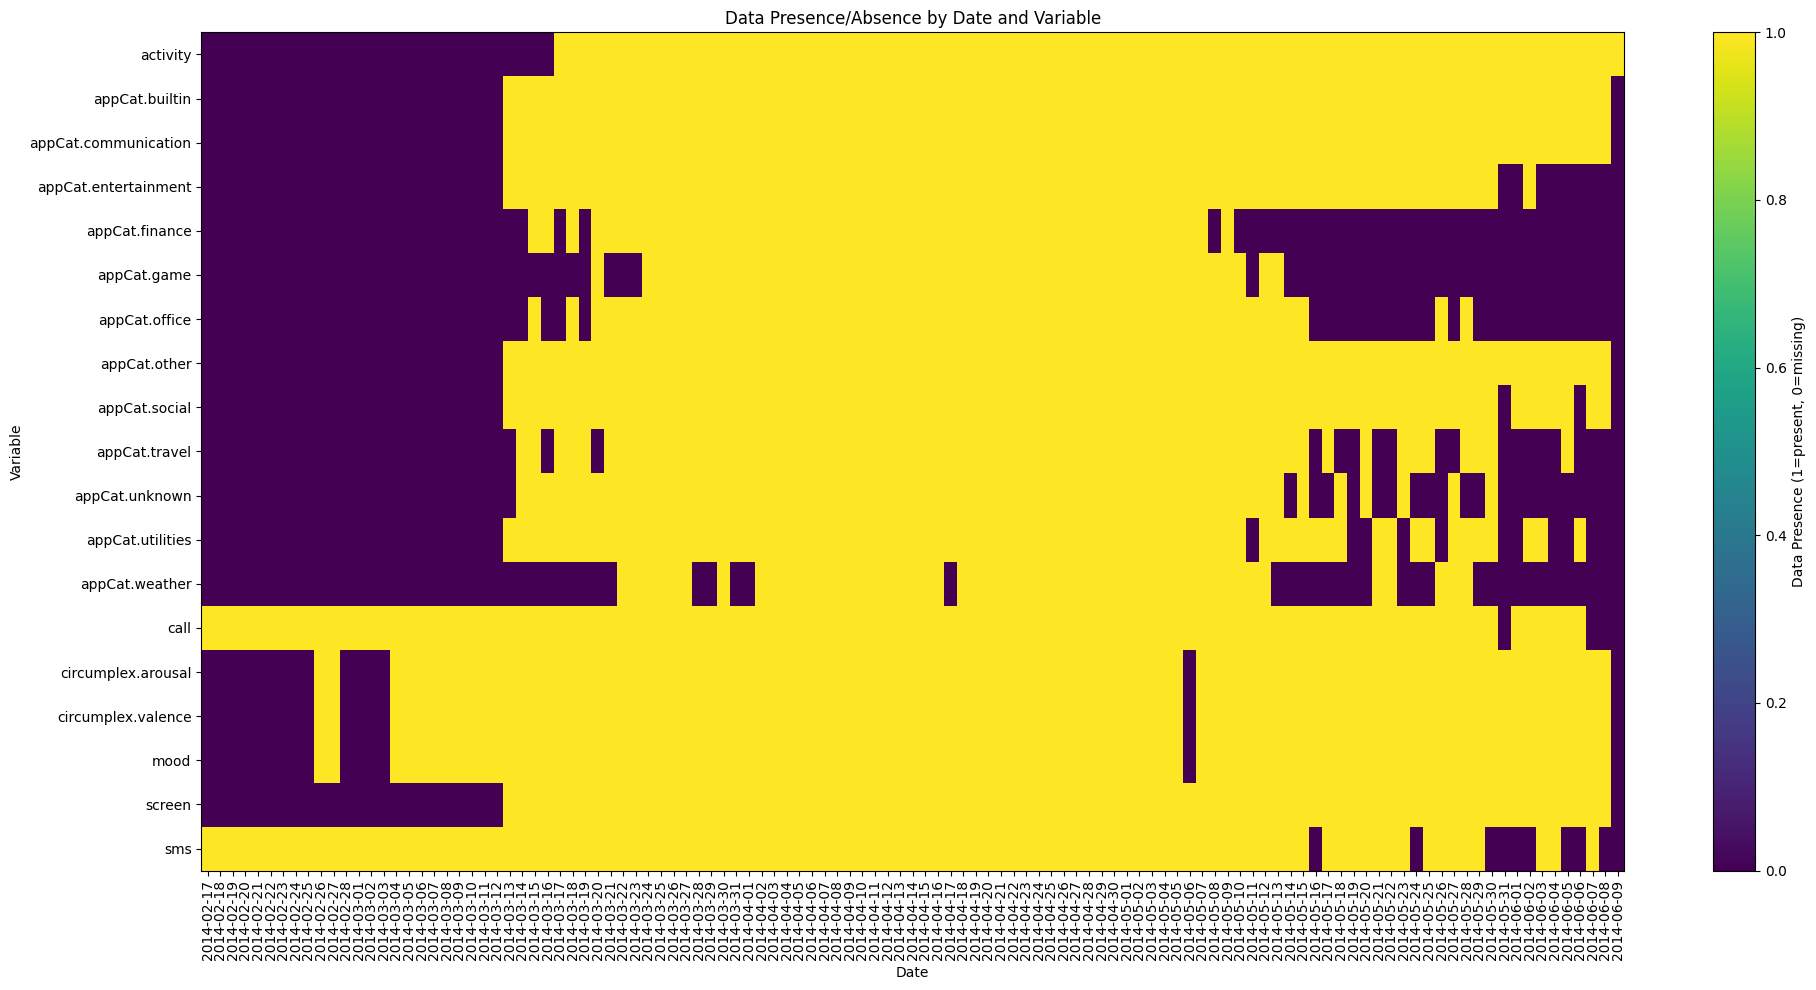

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert time to datetime if needed
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# 2. Extract the date from the timestamp
df['date'] = df['time'].dt.date  # gives a date object (YYYY-MM-DD)

# 3. Group by (date, variable) and count how many rows exist
#    This creates a table with date as the index, variable as columns, and counts as values.
df_presence = df.groupby(['date', 'variable']).size().unstack(fill_value=0)

# 4. Convert the counts to 1/0 presence/absence:
#    - If count > 0, we mark it as 1 (present), otherwise 0 (missing).
df_presence_binary = (df_presence > 0).astype(int)

# 5. Plot the presence/absence as a heatmap
plt.figure(figsize=(20, 10))
plt.imshow(df_presence_binary.T, 
           aspect='auto', 
           interpolation='nearest')  # you can pick a colormap argument if desired
plt.colorbar(label='Data Presence (1=present, 0=missing)')

# 6. Configure ticks/labels
plt.yticks(range(len(df_presence_binary.columns)), df_presence_binary.columns)
plt.xticks(range(len(df_presence_binary.index)), df_presence_binary.index, rotation=90)

plt.xlabel('Date')
plt.ylabel('Variable')
plt.title('Data Presence/Absence by Date and Variable')
plt.tight_layout()
plt.show()

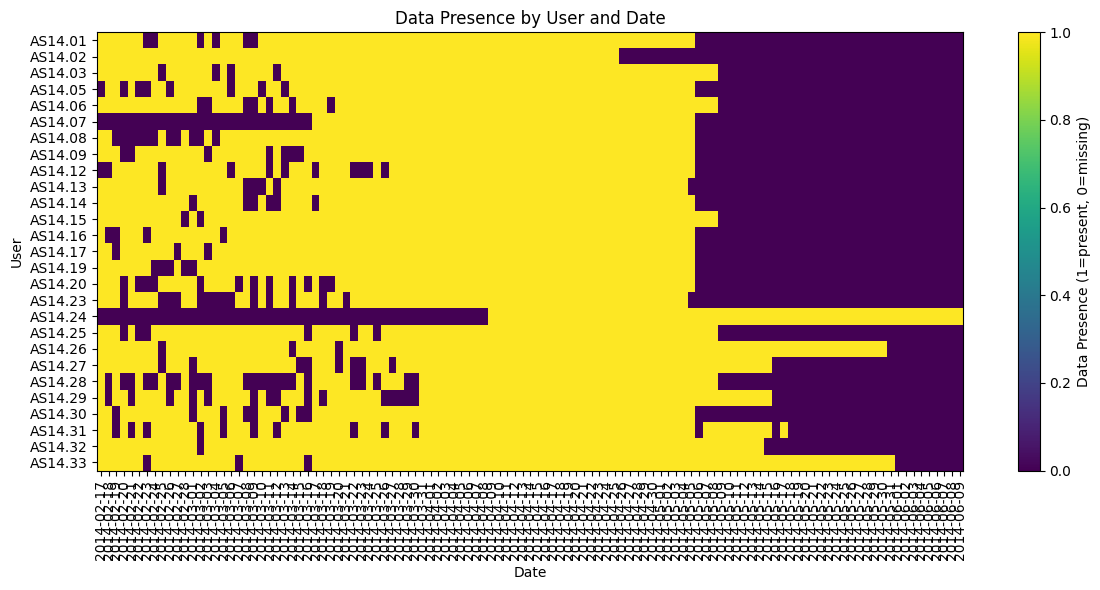

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'time' to datetime if needed
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# 2. Extract date from 'time' (YYYY-MM-DD)
df['date'] = df['time'].dt.date

# 3. Group by (id, date) and count how many rows
df_counts = df.groupby(['id', 'date']).size()

# 4. Unstack so columns become 'date' and rows become 'id'
df_matrix = df_counts.unstack(fill_value=0)

# 5. Convert counts to presence/absence
df_presence = (df_matrix > 0).astype(int)

# 6. Plot the presence/absence as a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(df_presence.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Data Presence (1=present, 0=missing)')

# 7. Configure ticks and labels
plt.yticks(range(len(df_presence.index)), df_presence.index)
plt.xticks(range(len(df_presence.columns)), df_presence.columns, rotation=90)

plt.ylabel('User')
plt.xlabel('Date')
plt.title('Data Presence by User and Date')
plt.tight_layout()
plt.show()

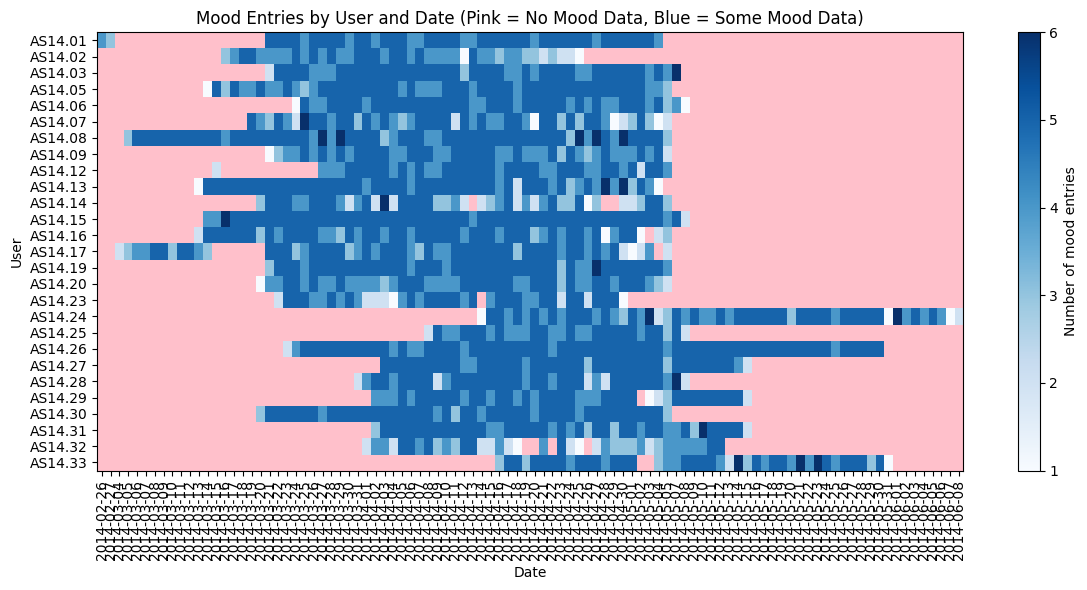

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Filter to just rows where variable == 'mood'
df_mood = df[df['variable'] == 'mood'].copy()

# 2) Convert 'time' to datetime, extract date
df_mood['time'] = pd.to_datetime(df_mood['time'], errors='coerce')
df_mood['date'] = df_mood['time'].dt.date

# 3) Group by (id, date) and count how many mood entries exist
df_counts = df_mood.groupby(['id','date']).size()

# 4) Unstack so rows = user (id), columns = date; fill missing combos with 0
df_matrix = df_counts.unstack(fill_value=0)

# 5) Convert to a NumPy array
arr = df_matrix.values  # shape = (num_users, num_dates)

# 6) Mask out zeros => they will appear black
arr_masked = np.ma.masked_where(arr == 0, arr)

# 7) Choose a colormap and set masked values to black
cmap = plt.cm.Blues.copy()  # or another colormap
cmap.set_bad(color='pink') # black for cells with 0 mood entries

# 8) Plot the heatmap
plt.figure(figsize=(12, 6))
im = plt.imshow(
    arr_masked,
    aspect='auto',
    interpolation='nearest',
    cmap=cmap
)

# 9) Add a colorbar to interpret the numeric range
plt.colorbar(im, label='Number of mood entries')

# 10) Configure ticks and labels
plt.yticks(range(len(df_matrix.index)), df_matrix.index)
plt.xticks(range(len(df_matrix.columns)), df_matrix.columns, rotation=90)

plt.ylabel('User')
plt.xlabel('Date')
plt.title("Mood Entries by User and Date (Pink = No Mood Data, Blue = Some Mood Data)")
plt.tight_layout()
plt.show()

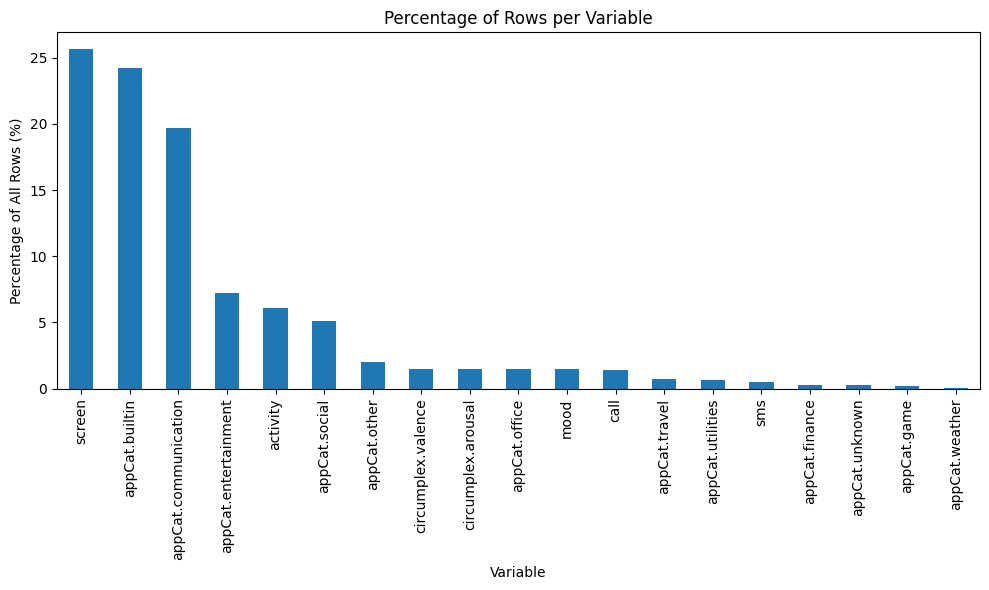

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df['variable'].value_counts(dropna=False)
total = counts.sum()
percentage = (counts / total) * 100

plt.figure(figsize=(10, 6))
percentage.plot(kind='bar')
plt.title("Percentage of Rows per Variable")
plt.xlabel("Variable")
plt.ylabel("Percentage of All Rows (%)")
plt.tight_layout()
plt.show()

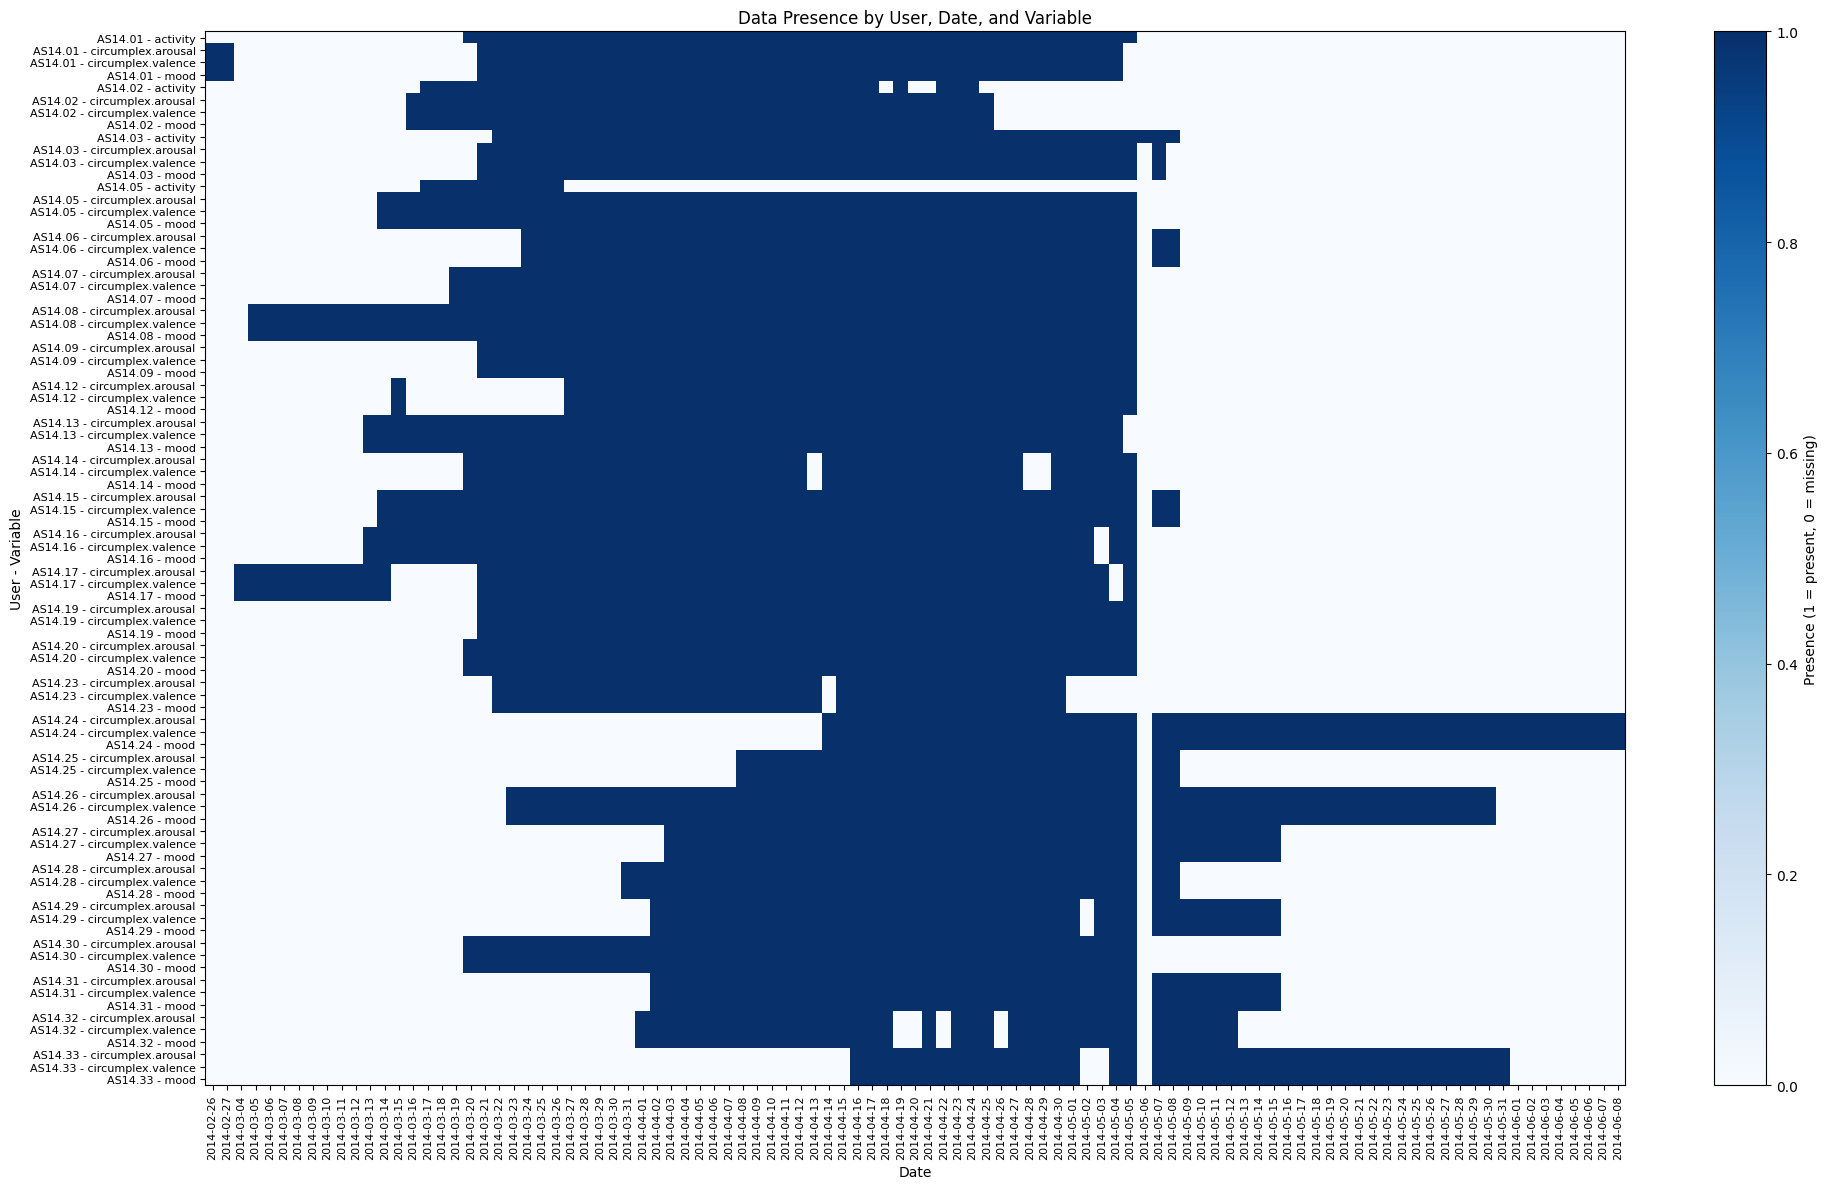

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1) Load Dataset
# -------------------------------------------------------
df = pd.read_csv('cleaned_long_format.csv')  # Adjust path if needed

# -------------------------------------------------------
# 2) Convert 'time' to datetime and extract date
# -------------------------------------------------------
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['date'] = df['time'].dt.date  # date as Python date object (YYYY-MM-DD)

# -------------------------------------------------------
# 3) (Optional) Standardize variable names (remove extra spaces)
# -------------------------------------------------------
df['variable'] = df['variable'].str.strip()

# -------------------------------------------------------
# 4) Create the Presence Matrix
# -------------------------------------------------------
# Group by user (id), variable, and date; count how many records exist
# Then unstack the date so that each column is a date.
presence = df.groupby(['id', 'variable', 'date']).size().unstack(fill_value=0)

# Convert counts to binary (1 if there is any entry, 0 if none)
presence_binary = (presence > 0).astype(int)

# -------------------------------------------------------
# 5) Create Row Labels as "User - Variable"
# -------------------------------------------------------
row_labels = [f"{user} - {var}" for user, var in presence_binary.index]

# -------------------------------------------------------
# 6) Plot the Heatmap
# -------------------------------------------------------
plt.figure(figsize=(20, 12))
plt.imshow(presence_binary.values, aspect='auto', interpolation='nearest', cmap='Blues')
plt.colorbar(label='Presence (1 = present, 0 = missing)')

# Set y-axis ticks with custom labels for each user-variable pair.
plt.yticks(range(len(row_labels)), row_labels, fontsize=8)
# Set x-axis ticks as the date (using the columns of the pivot table)
plt.xticks(range(len(presence_binary.columns)), presence_binary.columns, rotation=90, fontsize=8)

plt.xlabel('Date')
plt.ylabel('User - Variable')
plt.title('Data Presence by User, Date, and Variable')
plt.tight_layout()
plt.show()